<a href="https://colab.research.google.com/github/sungjin-kim-data/ML/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

np.random.seed(2021)

In [130]:
cancer = load_breast_cancer()

In [131]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [132]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [133]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

malignant = 1  
benigen = 0

In [134]:
data, target = cancer["data"], cancer['target']

In [135]:
data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [136]:
target[0]

0

In [137]:
df = pd.DataFrame(data, columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [138]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [140]:
df.shape[0] * df.shape[1]

17070

In [141]:
pd.Series(target).value_counts()

1    357
0    212
dtype: int64

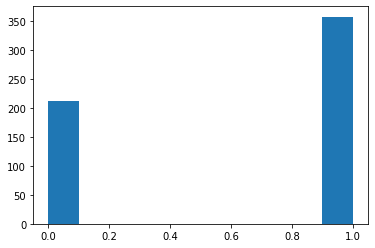

In [142]:
plt.hist(target)
plt.show()

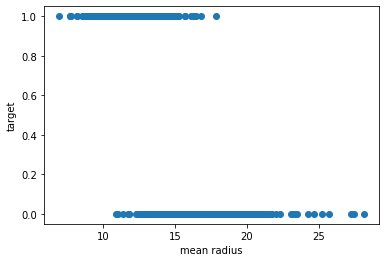

In [143]:
plt.scatter(x=data[:,0], y=target)
plt.xlabel('mean radius')
plt.ylabel('target')
plt.show()

mean radius가 클 수록 음성이 많고 작을수록 양성이 많다

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [146]:
print("train data 개수 :", len(X_train))
print("train data 개수 :", len(X_test))

train data 개수 : 398
train data 개수 : 171


In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [149]:
train_pred = linear.predict(X_train)
test_pred = linear.predict(X_test)

In [150]:
train_pred[:10]

array([0.96146558, 0.89505449, 0.72823154, 0.90631944, 0.80707028,
       0.59292471, 0.81200407, 0.90974937, 0.6956528 , 0.74770914])

LinearRegression에서는 결과 값이 0~1 사이를 벗어난 예측 값을 많이 볼 수 있다

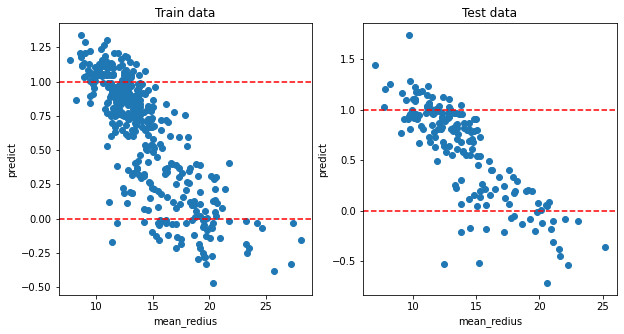

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

preds = [
    ("Train", X_train, train_pred),
    ("Test", X_test, test_pred)
]

for idx, (name, d, pred) in enumerate(preds):
  ax = axes[idx]
  ax.scatter(x=d[:,0], y=pred)
  ax.axhline(0, c='r', ls='--')
  ax.axhline(1, c='r', ls='--')
  ax.set_xlabel("mean_redius")
  ax.set_ylabel("predict")
  ax.set_title(f"{name} data")

In [152]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(y_train, train_pred)
auroc = auc(fpr, tpr)

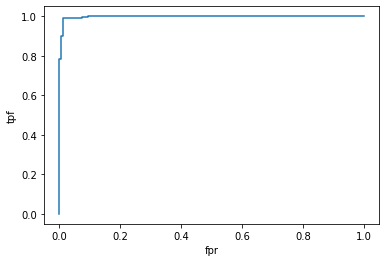

In [153]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpf")
plt.show()

In [154]:
print(f"AUROC : {auroc:.4f}")

AUROC : 0.9973


In [155]:
np.argmax(tpr-fpr)

6

In [156]:
j = tpr = fpr
idx = np.argmax(j)
best_thresh = threshold[idx]
print(f"Best Trhreshold is {best_thresh:.4f}")
print(f"Best Trhreshold`s sensitivity is  {tpr[idx]:.4f}")
print(f"Best Trhreshold`s specificity {1-fpr[idx]:.4f}")
print(f"Best Trhreshold`s j is {j[idx]:.4f}")

Best Trhreshold is -0.4669
Best Trhreshold`s sensitivity is  1.0000
Best Trhreshold`s specificity 0.0000
Best Trhreshold`s j is 1.0000


In [157]:
train_pred_label = list(map(int, (train_pred > best_thresh)))
test_pred_label = list(map(int, (test_pred > best_thresh)))

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
linear_train_acc = accuracy_score(y_train, train_pred_label)
linear_test_acc = accuracy_score(y_test, test_pred_label)

In [160]:
print(f"Train accuracy is : {linear_train_acc:.2f}")
print(f"Train accuracy is : {linear_test_acc:.2f}")

Train accuracy is : 0.63
Train accuracy is : 0.65


##Logistic Regression

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
sc = StandardScaler()

In [163]:
sc.fit(X_train)

StandardScaler()

In [164]:
sc_X_train = sc.transform(X_train)
sc_X_test = sc.transform(X_test)

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
logit = LogisticRegression()

In [167]:
logit.fit(sc_X_train, y_train)

LogisticRegression()

In [168]:
train_pred = logit.predict(sc_X_train)
test_pred = logit.predict(sc_X_test)

predict = 해당 데이터가 어떤 class로 분류 할지  
predict_proba = 각 class에 속할 확률

In [169]:
train_pred[:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [170]:
train_pred_logit = logit.predict_proba(sc_X_train)
test_pred_logit = logit.predict_proba(sc_X_test)

In [171]:
train_pred_logit[:10]

array([[0.0012717 , 0.9987283 ],
       [0.00100327, 0.99899673],
       [0.0732777 , 0.9267223 ],
       [0.002737  , 0.997263  ],
       [0.03364059, 0.96635941],
       [0.8610699 , 0.1389301 ],
       [0.0371566 , 0.9628434 ],
       [0.00207659, 0.99792341],
       [0.01929903, 0.98070097],
       [0.08163595, 0.91836405]])

In [172]:
train_pred_logit = train_pred_logit[:, 1]
test_pred_logit = test_pred_logit[:, 1]

In [173]:
from sklearn.metrics import auc, roc_curve

In [176]:
fpr, tpr, threshold = roc_curve(y_train, train_pred_logit)
auroc = auc(fpr, tpr)

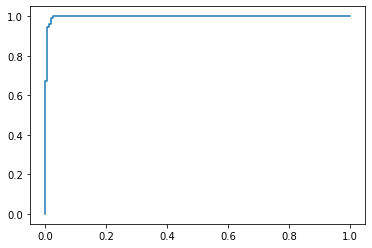

In [175]:
plt.plot(fpr, tpr)
plt.show()

In [177]:
print("AUROC :", auroc)

AUROC : 0.9971159807013289


In [179]:
J = tpr - fpr
idx = np.argmax(J)
best_thresh = threshold[idx]

print(f"Best threshold : {best_thresh:.4f}")
print(f"Best threshold`s sensitivity : {tpr[idx]:.4f}")
print(f"Best threshold`s specificity : {1 - fpr[idx]:.4f}")
print(f"Best threshold`s J is : {J[idx]:.4f}")

Best threshold : 0.4554
Best threshold`s sensitivity : 1.0000
Best threshold`s specificity : 0.9732
Best threshold`s J is : 0.9732


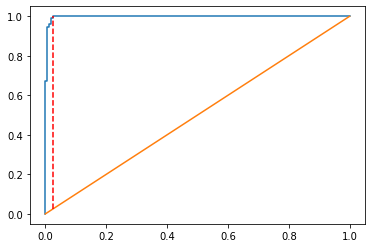

In [183]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.plot((fpr[idx], fpr[idx]),(fpr[idx], tpr[idx]), c='r', ls='--')
plt.show()

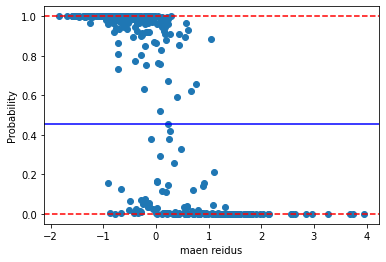

In [188]:
plt.scatter(x=sc_X_train[:, 0], y=train_pred_logit)
plt.axhline(best_thresh, c="b")
plt.axhline(0, c="r", ls='--')
plt.axhline(1, c="r", ls='--')
plt.xlabel('maen reidus')
plt.ylabel('Probability');

In [189]:
train_pred_label = list(map(int, (train_pred_logit > best_thresh)))
test_pred_label = list(map(int, (test_pred_logit > best_thresh)))

In [190]:
proba_train_acc = accuracy_score(y_train, train_pred_label)
proba_test_acc = accuracy_score(y_test, test_pred_label)

In [195]:
print(f"Train accuracy is : {proba_train_acc}")
print(f"Test accuracy is : {proba_test_acc}")

Train accuracy is : 0.9874371859296482
Test accuracy is : 0.9824561403508771


In [192]:
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

In [194]:
print(f"Train accuracy is : {train_acc}")
print(f"Test accuracy is : {test_acc}")

Train accuracy is : 0.9874371859296482
Test accuracy is : 0.9824561403508771


In [196]:
print(f"Linear Regression Test Acc : {linear_test_acc}")
print(f"Logistic Regression predict_proba Test Acc : {proba_test_acc}")
print(f"Logistic Regression predict Test Acc : {test_acc}")

Linear Regression Test Acc : 0.6549707602339181
Logistic Regression predict_proba Test Acc : 0.9824561403508771
Logistic Regression predict Test Acc : 0.9824561403508771
